In [1]:
include("lecture20-linsys_sor.jl")
include("lecture20-linsys_jacobi.jl")
using Plots
using LaTeXStrings
pyplot(legend=false)

function numgridS(n)
  A = zeros(Int,n,n)
  tofill = (n-2)^2
  h = 1
  for r = 2:n-1
    for c = 2:n-1
      A[r,c] = h+(c-2)*(n-2)
    end
    h += 1
  end
  return A
end

#fdlaplacian from (http://nbviewer.jupyter.org/url/homepages.warwick.ac.uk/staff/C.Ortner/julia/Laplacian.ipynb)
# with modification
function fdlaplacian(G)
  # read info about G
  M, N = size(G)
  nonz = find(G)
  # define function to create a 1D laplacian and a sparse identity
  fdl1(m) = spdiagm((-ones(m-1),2*ones(m),-ones(m-1)), [-1,0,1])
  # laplace operator on the full grid
  A = kron(speye(M), fdl1(N)) + kron(fdl1(M), speye(N))
  # return the restriction to the coloured grid points
  return A[nonz, nonz]
end



fdlaplacian (generic function with 1 method)

In [6]:
## Does Gauss-Seidel always converge faster than Jacobi?
A = fdlaplacian(numgridS(22))
n = size(A,1)
b = ones(n);
x1,hist1 = linsys_jacobi(A,b)
x2,hist2 = linsys_sor(A,b,1,1e-8,1000)



 iter=       1  diff= 2.5e-01  res= 8.6e-01  time=    0.0
 iter=       2  diff= 2.5e-01  res= 8.4e-01  time=    0.0
 iter=       3  diff= 2.5e-01  res= 8.3e-01  time=    0.0
 iter=       4  diff= 2.5e-01  res= 8.2e-01  time=    0.0
 iter=       5  diff= 2.5e-01  res= 8.0e-01  time=    0.0
 iter=       6  diff= 2.5e-01  res= 7.9e-01  time=    0.0
 iter=       7  diff= 2.5e-01  res= 7.8e-01  time=    0.0
 iter=       8  diff= 2.5e-01  res= 7.7e-01  time=    0.0
 iter=       9  diff= 2.5e-01  res= 7.6e-01  time=    0.0
 iter=      10  diff= 2.5e-01  res= 7.5e-01  time=    0.0
 iter=      20  diff= 2.5e-01  res= 6.5e-01  time=    0.0
 iter=      30  diff= 2.4e-01  res= 5.8e-01  time=    0.0
 iter=      40  diff= 2.3e-01  res= 5.2e-01  time=    0.0
 iter=      50  diff= 2.1e-01  res= 4.6e-01  time=    0.0
 iter=      60  diff= 1.9e-01  res= 4.1e-01  time=    0.0
 iter=      70  diff= 1.7e-01  res= 3.7e-01  time=    0.0
 iter=      80  diff= 1.6e-01  res= 3.3e-01  time=    0.0
 iter=      90

([1.75563, 3.01125, 3.96444, 4.70786, 5.29186, 5.74685, 6.09252, 6.342, 6.50394, 6.58365  …  6.58365, 6.50394, 6.342, 6.09252, 5.74685, 5.29186, 4.70786, 3.96444, 3.01125, 1.75563], [0.5, 0.5, 0.499999, 0.499994, 0.499963, 0.499833, 0.499374, 0.498729, 0.497358, 0.495793  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [2]:
A = fdlaplacian(numgridS(22))
@show size(A)

size(A) = (400, 400)


(400, 400)

 iter=       1  diff= 2.5e-01  res= 8.6e-01  time=    0.0
 iter=       2  diff= 2.5e-01  res= 8.4e-01  time=    0.0
 iter=       3  diff= 2.5e-01  res= 8.3e-01  time=    0.0
 iter=       4  diff= 2.5e-01  res= 8.2e-01  time=    0.0
 iter=       5  diff= 2.5e-01  res= 8.0e-01  time=    0.0
 iter=       6  diff= 2.5e-01  res= 7.9e-01  time=    0.0
 iter=       7  diff= 2.5e-01  res= 7.8e-01  time=    0.0
 iter=       8  diff= 2.5e-01  res= 7.7e-01  time=    0.0
 iter=       9  diff= 2.5e-01  res= 7.6e-01  time=    0.0
 iter=      10  diff= 2.5e-01  res= 7.5e-01  time=    0.0
 iter=      20  diff= 2.5e-01  res= 6.5e-01  time=    0.0
 iter=      30  diff= 2.4e-01  res= 5.8e-01  time=    0.0
 iter=      40  diff= 2.3e-01  res= 5.2e-01  time=    0.0
 iter=      50  diff= 2.1e-01  res= 4.6e-01  time=    0.0
 iter=      60  diff= 1.9e-01  res= 4.1e-01  time=    0.0
 iter=      70  diff= 1.7e-01  res= 3.7e-01  time=    0.0
 iter=      80  diff= 1.6e-01  res= 3.3e-01  time=    0.0
 iter=      90

    did not converge to a tolerance of 1.0e-08
    in 200 steps



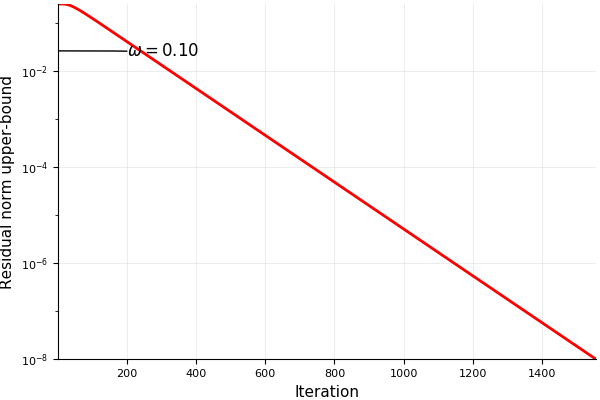

 iter=       1  diff= 1.7e-01  res= 8.8e-01  time=    0.0
 iter=       2  diff= 1.7e-01  res= 8.6e-01  time=    0.0
 iter=       3  diff= 1.7e-01  res= 8.5e-01  time=    0.0
 iter=       4  diff= 1.7e-01  res= 8.4e-01  time=    0.0
 iter=       5  diff= 1.7e-01  res= 8.3e-01  time=    0.0
 iter=       6  diff= 1.7e-01  res= 8.2e-01  time=    0.0
 iter=       7  diff= 1.7e-01  res= 8.1e-01  time=    0.0
 iter=       8  diff= 1.7e-01  res= 8.0e-01  time=    0.0
 iter=       9  diff= 1.7e-01  res= 7.9e-01  time=    0.0
 iter=      10  diff= 1.7e-01  res= 7.8e-01  time=    0.0
 iter=      20  diff= 1.7e-01  res= 7.1e-01  time=    0.0
 iter=      30  diff= 1.7e-01  res= 6.6e-01  time=    0.0
 iter=      40  diff= 1.6e-01  res= 6.1e-01  time=    0.0
 iter=      50  diff= 1.6e-01  res= 5.6e-01  time=    0.0
 iter=      60  diff= 1.5e-01  res= 5.2e-01  time=    0.0
 iter=      70  diff= 1.4e-01  res= 4.8e-01  time=    0.0
 iter=      80  diff= 1.3e-01  res= 4.5e-01  time=    0.0
 iter=      90

    did not converge to a tolerance of 1.0e-08
    in 200 steps



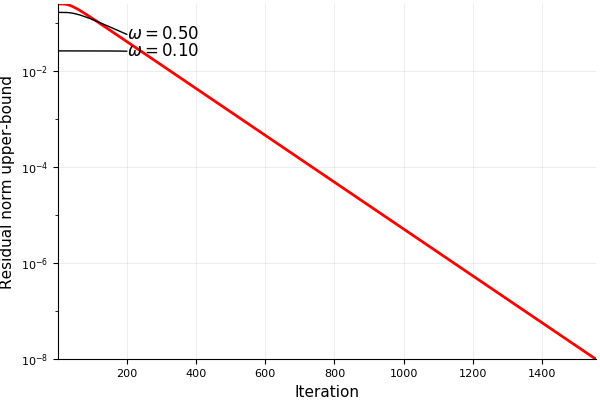

 iter=       1  diff= 4.1e-01  res= 8.5e-01  time=    0.0
 iter=       2  diff= 4.1e-01  res= 8.3e-01  time=    0.0
 iter=       3  diff= 4.1e-01  res= 8.1e-01  time=    0.0
 iter=       4  diff= 4.1e-01  res= 7.9e-01  time=    0.0
 iter=       5  diff= 4.1e-01  res= 7.7e-01  time=    0.0
 iter=       6  diff= 4.1e-01  res= 7.5e-01  time=    0.0
 iter=       7  diff= 4.1e-01  res= 7.3e-01  time=    0.0
 iter=       8  diff= 4.1e-01  res= 7.2e-01  time=    0.0
 iter=       9  diff= 4.1e-01  res= 7.0e-01  time=    0.0
 iter=      10  diff= 4.1e-01  res= 6.9e-01  time=    0.0
 iter=      20  diff= 3.9e-01  res= 5.7e-01  time=    0.0
 iter=      30  diff= 3.5e-01  res= 4.7e-01  time=    0.0
 iter=      40  diff= 3.0e-01  res= 3.9e-01  time=    0.0
 iter=      50  diff= 2.5e-01  res= 3.3e-01  time=    0.0
 iter=      60  diff= 2.1e-01  res= 2.7e-01  time=    0.0
 iter=      70  diff= 1.8e-01  res= 2.3e-01  time=    0.0
 iter=      80  diff= 1.5e-01  res= 1.9e-01  time=    0.0
 iter=      90

    did not converge to a tolerance of 1.0e-08
    in 200 steps



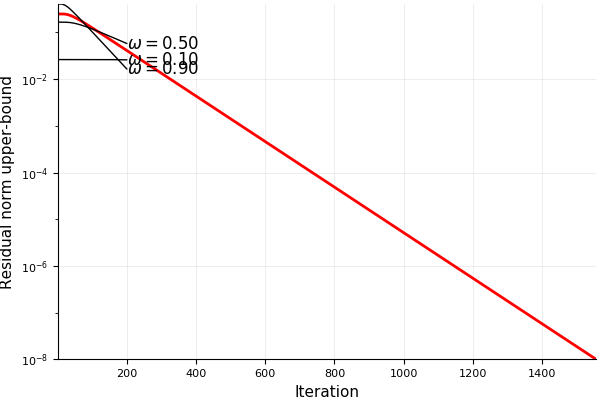

 iter=       1  diff= 5.0e-01  res= 8.5e-01  time=    0.0
 iter=       2  diff= 5.0e-01  res= 8.2e-01  time=    0.0
 iter=       3  diff= 5.0e-01  res= 7.9e-01  time=    0.0
 iter=       4  diff= 5.0e-01  res= 7.7e-01  time=    0.0
 iter=       5  diff= 5.0e-01  res= 7.5e-01  time=    0.0
 iter=       6  diff= 5.0e-01  res= 7.3e-01  time=    0.0
 iter=       7  diff= 5.0e-01  res= 7.1e-01  time=    0.0
 iter=       8  diff= 5.0e-01  res= 6.9e-01  time=    0.0
 iter=       9  diff= 5.0e-01  res= 6.8e-01  time=    0.0
 iter=      10  diff= 5.0e-01  res= 6.6e-01  time=    0.0
 iter=      20  diff= 4.5e-01  res= 5.2e-01  time=    0.0
 iter=      30  diff= 3.9e-01  res= 4.2e-01  time=    0.0
 iter=      40  diff= 3.1e-01  res= 3.3e-01  time=    0.0
 iter=      50  diff= 2.5e-01  res= 2.7e-01  time=    0.0
 iter=      60  diff= 2.0e-01  res= 2.1e-01  time=    0.0
 iter=      70  diff= 1.6e-01  res= 1.7e-01  time=    0.0
 iter=      80  diff= 1.3e-01  res= 1.4e-01  time=    0.0
 iter=      90

    did not converge to a tolerance of 1.0e-08
    in 200 steps



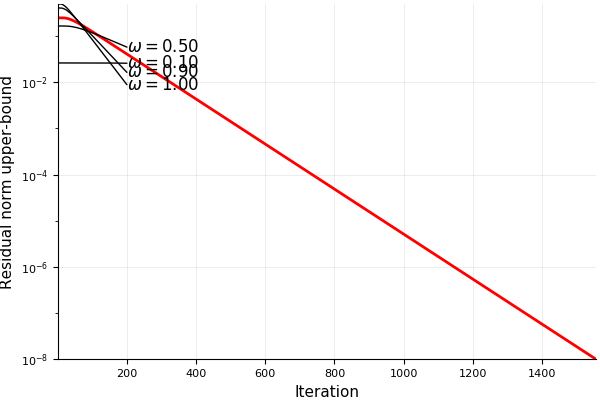

 iter=       1  diff= 7.5e-01  res= 8.4e-01  time=    0.0
 iter=       2  diff= 7.5e-01  res= 8.0e-01  time=    0.0
 iter=       3  diff= 7.5e-01  res= 7.6e-01  time=    0.0
 iter=       4  diff= 7.5e-01  res= 7.3e-01  time=    0.0
 iter=       5  diff= 7.5e-01  res= 7.1e-01  time=    0.0
 iter=       6  diff= 7.5e-01  res= 6.8e-01  time=    0.0
 iter=       7  diff= 7.4e-01  res= 6.5e-01  time=    0.0
 iter=       8  diff= 7.4e-01  res= 6.3e-01  time=    0.0
 iter=       9  diff= 7.3e-01  res= 6.1e-01  time=    0.0
 iter=      10  diff= 7.2e-01  res= 5.9e-01  time=    0.0
 iter=      20  diff= 5.9e-01  res= 4.2e-01  time=    0.0
 iter=      30  diff= 4.3e-01  res= 3.0e-01  time=    0.0
 iter=      40  diff= 3.1e-01  res= 2.2e-01  time=    0.0
 iter=      50  diff= 2.2e-01  res= 1.6e-01  time=    0.0
 iter=      60  diff= 1.6e-01  res= 1.1e-01  time=    0.0
 iter=      70  diff= 1.1e-01  res= 7.9e-02  time=    0.0
 iter=      80  diff= 8.1e-02  res= 5.6e-02  time=    0.0
 iter=      90

    did not converge to a tolerance of 1.0e-08
    in 200 steps



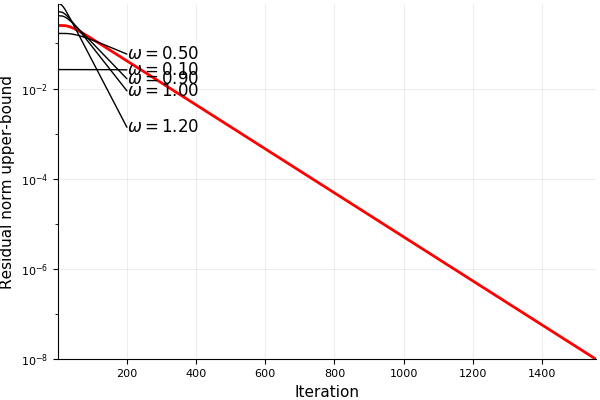

 iter=       1  diff= 1.5e+00  res= 8.3e-01  time=    0.0
 iter=       2  diff= 1.5e+00  res= 7.6e-01  time=    0.0
 iter=       3  diff= 1.5e+00  res= 7.0e-01  time=    0.0
 iter=       4  diff= 1.5e+00  res= 6.5e-01  time=    0.0
 iter=       5  diff= 1.5e+00  res= 6.1e-01  time=    0.0
 iter=       6  diff= 1.4e+00  res= 5.7e-01  time=    0.0
 iter=       7  diff= 1.4e+00  res= 5.3e-01  time=    0.0
 iter=       8  diff= 1.3e+00  res= 5.0e-01  time=    0.0
 iter=       9  diff= 1.3e+00  res= 4.7e-01  time=    0.0
 iter=      10  diff= 1.2e+00  res= 4.4e-01  time=    0.0
 iter=      20  diff= 6.7e-01  res= 2.3e-01  time=    0.0
 iter=      30  diff= 3.4e-01  res= 1.2e-01  time=    0.0
 iter=      40  diff= 1.7e-01  res= 5.9e-02  time=    0.0
 iter=      50  diff= 8.4e-02  res= 2.9e-02  time=    0.0
 iter=      60  diff= 4.2e-02  res= 1.4e-02  time=    0.0
 iter=      70  diff= 2.0e-02  res= 7.1e-03  time=    0.0
 iter=      80  diff= 1.0e-02  res= 3.5e-03  time=    0.0
 iter=      90

    did not converge to a tolerance of 1.0e-08
    in 200 steps



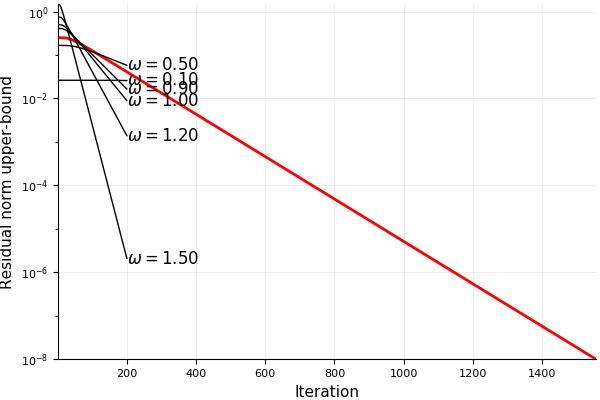

 iter=       1  diff= 4.3e+00  res= 1.1e+00  time=    0.0
 iter=       2  diff= 4.2e+00  res= 9.3e-01  time=    0.0
 iter=       3  diff= 4.0e+00  res= 8.1e-01  time=    0.0
 iter=       4  diff= 3.7e+00  res= 7.1e-01  time=    0.0
 iter=       5  diff= 3.5e+00  res= 6.2e-01  time=    0.0
 iter=       6  diff= 3.2e+00  res= 5.5e-01  time=    0.0
 iter=       7  diff= 2.9e+00  res= 4.9e-01  time=    0.0
 iter=       8  diff= 2.6e+00  res= 4.3e-01  time=    0.0
 iter=       9  diff= 2.2e+00  res= 3.8e-01  time=    0.0
 iter=      10  diff= 1.9e+00  res= 3.3e-01  time=    0.0
 iter=      20  diff= 3.0e-01  res= 8.5e-02  time=    0.0
 iter=      30  diff= 1.1e-01  res= 2.3e-02  time=    0.0
 iter=      40  diff= 2.8e-02  res= 3.6e-03  time=    0.0
 iter=      50  diff= 6.9e-04  res= 9.6e-05  time=    0.0
 iter=      60  diff= 8.9e-05  res= 1.3e-05  time=    0.0
 iter=      70  diff= 5.3e-06  res= 2.1e-06  time=    0.0
 iter=      80  diff= 2.0e-06  res= 4.3e-07  time=    0.0
 iter=      90


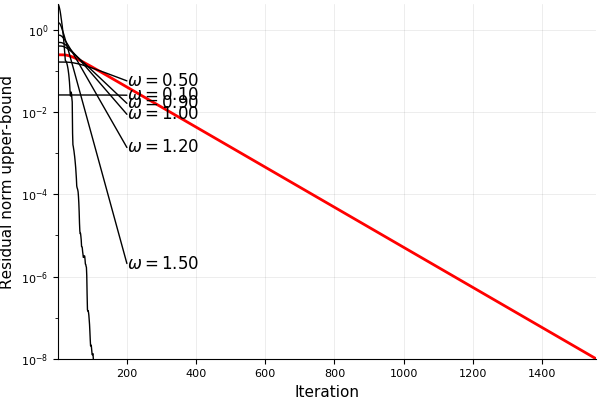

 iter=       1  diff= 7.6e+00  res= 1.6e+00  time=    0.0
 iter=       2  diff= 6.9e+00  res= 1.5e+00  time=    0.0
 iter=       3  diff= 6.3e+00  res= 1.4e+00  time=    0.0
 iter=       4  diff= 5.7e+00  res= 1.3e+00  time=    0.0
 iter=       5  diff= 5.1e+00  res= 1.3e+00  time=    0.0
 iter=       6  diff= 4.5e+00  res= 1.2e+00  time=    0.0
 iter=       7  diff= 3.9e+00  res= 1.1e+00  time=    0.0
 iter=       8  diff= 3.4e+00  res= 1.1e+00  time=    0.0
 iter=       9  diff= 3.0e+00  res= 1.0e+00  time=    0.0
 iter=      10  diff= 2.7e+00  res= 9.7e-01  time=    0.0
 iter=      20  diff= 1.5e+00  res= 5.7e-01  time=    0.0
 iter=      30  diff= 7.5e-01  res= 3.1e-01  time=    0.0
 iter=      40  diff= 6.5e-01  res= 1.2e-01  time=    0.1
 iter=      50  diff= 5.6e-02  res= 1.6e-02  time=    0.1
 iter=      60  diff= 3.3e-02  res= 8.3e-03  time=    0.1
 iter=      70  diff= 6.6e-03  res= 3.7e-03  time=    0.1
 iter=      80  diff= 7.2e-03  res= 1.6e-03  time=    0.1
 iter=      90

    did not converge to a tolerance of 1.0e-08
    in 200 steps



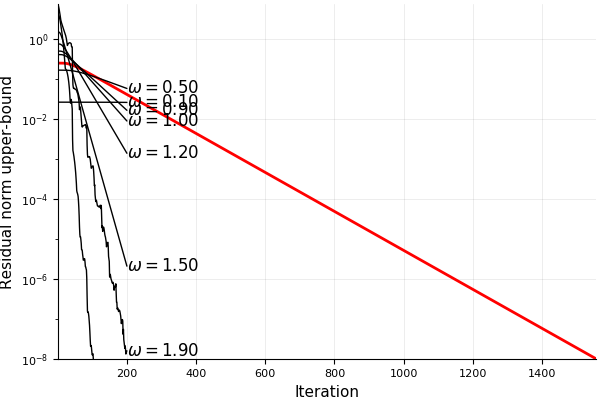

 iter=       1  diff= 1.1e+01  res= 2.2e+00  time=    0.0
 iter=       2  diff= 9.7e+00  res= 2.2e+00  time=    0.0
 iter=       3  diff= 9.5e+00  res= 2.2e+00  time=    0.0
 iter=       4  diff= 8.8e+00  res= 2.1e+00  time=    0.0
 iter=       5  diff= 8.1e+00  res= 2.1e+00  time=    0.0
 iter=       6  diff= 7.2e+00  res= 2.1e+00  time=    0.0
 iter=       7  diff= 6.6e+00  res= 2.1e+00  time=    0.0
 iter=       8  diff= 6.0e+00  res= 2.0e+00  time=    0.0
 iter=       9  diff= 5.6e+00  res= 2.0e+00  time=    0.0
 iter=      10  diff= 5.2e+00  res= 2.0e+00  time=    0.0
 iter=      20  diff= 2.8e+00  res= 1.6e+00  time=    0.0
 iter=      30  diff= 3.6e+00  res= 1.1e+00  time=    0.0
 iter=      40  diff= 3.3e+00  res= 6.3e-01  time=    0.0
 iter=      50  diff= 6.8e-01  res= 2.5e-01  time=    0.0
 iter=      60  diff= 4.7e-01  res= 1.9e-01  time=    0.0
 iter=      70  diff= 4.1e-01  res= 1.3e-01  time=    0.0
 iter=      80  diff= 3.0e-01  res= 8.1e-02  time=    0.0
 iter=      90

    did not converge to a tolerance of 1.0e-08
    in 200 steps



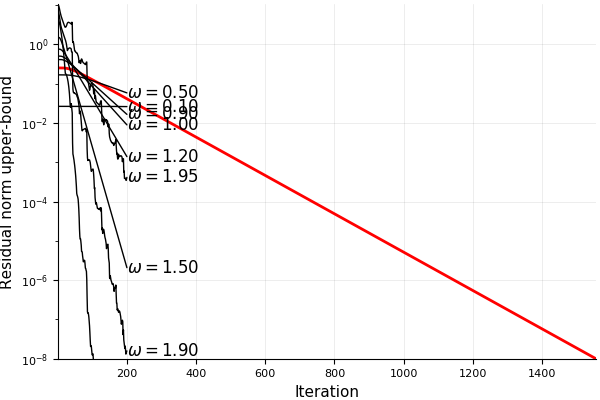

In [7]:
##
x1,hist1 = linsys_jacobi(A,b)
hist1_toplot = hist1[find(hist1)]
h = plot(hist1_toplot,yscale=:log10,linewidth=2,color=:red)
xlabel!(h,"Iteration")
ylabel!(h,"Residual norm upper-bound")
omegas = [0.1,0.5,0.9,1,1.2,1.5,1.8,1.9,1.95]
for i = 1:length(omegas)
  x,hist = linsys_sor(A,b,omegas[i])
  hist_toplot = hist[find(hist)]
  plot!(h,hist_toplot,yscale=:log10,color=:black)
  om = omegas[i]
  annotate!(h,[(length(hist),hist[end],
  text(join([L"\omega =",@sprintf("%.2f",omegas[i])]),12,:black,:left))])
  sleep(2)
  display(h)
end


In [11]:
A = full(fdlaplacian(numgridS(4)))

4×4 Array{Float64,2}:
  4.0  -1.0  -1.0   0.0
 -1.0   4.0   0.0  -1.0
 -1.0   0.0   4.0  -1.0
  0.0  -1.0  -1.0   4.0

In [8]:
@show A

A = 
  [1  ,   1]  =  4.0
  [2  ,   1]  =  -1.0
  [21 ,   1]  =  -1.0
  [1  ,   2]  =  -1.0
  [2  ,   2]  =  4.0
  [3  ,   2]  =  -1.0
  [22 ,   2]  =  -1.0
  [2  ,   3]  =  -1.0
  [3  ,   3]  =  4.0
  [4  ,   3]  =  -1.0
  [23 ,   3]  =  -1.0
  [3  ,   4]  =  -1.0
  [4  ,   4]  =  4.0
  [5  ,   4]  =  -1.0
  [24 ,   4]  =  -1.0
  [4  ,   5]  =  -1.0
  [5  ,   5]  =  4.0
  [6  ,   5]  =  -1.0
  [25 ,   5]  =  -1.0
  [5  ,   6]  =  -1.0
  [6  ,   6]  =  4.0
  [7  ,   6]  =  -1.0
  [26 ,   6]  =  -1.0
  [6  ,   7]  =  -1.0
  [7  ,   7]  =  4.0
  [8  ,   7]  =  -1.0
  [27 ,   7]  =  -1.0
  [7  ,   8]  =  -1.0
  [8  ,   8]  =  4.0
  [9  ,   8]  =  -1.0
  [28 ,   8]  =  -1.0
  [8  ,   9]  =  -1.0
  [9  ,   9]  =  4.0
  [10 ,   9]  =  -1.0
  [29 ,   9]  =  -1.0
  [9  ,  10]  =  -1.0
  [10 ,  10]  =  4.0
  [11 ,  10]  =  -1.0
  [30 ,  10]  =  -1.0
  [10 ,  11]  =  -1.0
  [11 ,  11]  =  4.0
  [12 ,  11]  =  -1.0
  [31 ,  11]  =  -1.0
  [11 ,  12]  =  -1.0
  [12 ,  12]  =  4.0
  [13 ,  12]  =  

  [400, 400]  =  4.0


400×400 SparseMatrixCSC{Float64,Int64} with 1920 stored entries:
  [1  ,   1]  =  4.0
  [2  ,   1]  =  -1.0
  [21 ,   1]  =  -1.0
  [1  ,   2]  =  -1.0
  [2  ,   2]  =  4.0
  [3  ,   2]  =  -1.0
  [22 ,   2]  =  -1.0
  [2  ,   3]  =  -1.0
  [3  ,   3]  =  4.0
  [4  ,   3]  =  -1.0
  ⋮
  [378, 398]  =  -1.0
  [397, 398]  =  -1.0
  [398, 398]  =  4.0
  [399, 398]  =  -1.0
  [379, 399]  =  -1.0
  [398, 399]  =  -1.0
  [399, 399]  =  4.0
  [400, 399]  =  -1.0
  [380, 400]  =  -1.0
  [399, 400]  =  -1.0
  [400, 400]  =  4.0